<a href="https://colab.research.google.com/github/1234tirm/Hello-world/blob/main/Text_clustering_arxiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bertopic datasets openai datamapplot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00
  Created

In [2]:
#Load data from huggingface
from datasets import load_dataset
dataset = load_dataset("MaartenGr/arxiv_nlp")["train"]

# Extract metadata
abstracts = dataset["Abstracts"]
title = dataset["Titles"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44949 [00:00<?, ? examples/s]

# Embedding Model

In [3]:
from sentence_transformers import SentenceTransformer

# Create an embedding for each abstract
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar= True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [4]:
embeddings.shape

(44949, 384)

# Reducing the dimensionality

In [5]:
from umap import UMAP

# we reduce the input embeddings dimensionality from 384 to 5

umap_model = UMAP(n_components=5, min_dist= 0.0, metric= 'cosine', random_state = 42)
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# Cluster the Reduced Embeddings

In [6]:
from hdbscan import HDBSCAN

# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size= 50, metric='euclidean', cluster_selection_method= 'eom'
).fit(reduced_embeddings)
clusters = hdbscan_model.labels_

# number of clusters
print(len(set(clusters)))


153


In [20]:
y=[]
cluster = 0
y.append(np.where(clusters==cluster))
print(y)
print(y[0])
print(y[0][0])
print(len(y))
print(len(y[0[0]]))

[(array([  313,   319,   337,   339,   518,   768,   769,   776,   777,
        1073,  1741,  2437,  2534,  2996,  3991,  4460,  7471, 11676,
       11715, 12740, 13159, 13631, 14095, 14174, 14175, 16966, 19402,
       19723, 19807, 22548, 22641, 22865, 23257, 24030, 24392, 24609,
       24651, 25045, 25231, 25750, 25814, 25859, 26436, 26770, 26891,
       27653, 27680, 28969, 29035, 29085, 29106, 29601, 29900, 30532,
       30637, 31628, 31910, 32524, 33002, 33162, 33400, 33752, 34055,
       35105, 36132, 36160, 36365, 36499, 36522, 37072, 37606, 38061,
       38107, 38324, 38325, 38327, 38576, 38599, 39315, 40717, 41447,
       41661, 42088, 43092, 43116, 43198]),)]
(array([  313,   319,   337,   339,   518,   768,   769,   776,   777,
        1073,  1741,  2437,  2534,  2996,  3991,  4460,  7471, 11676,
       11715, 12740, 13159, 13631, 14095, 14174, 14175, 16966, 19402,
       19723, 19807, 22548, 22641, 22865, 23257, 24030, 24392, 24609,
       24651, 25045, 25231, 25750, 25814,

<>:8: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:8: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<ipython-input-20-d0bc8ae413ef>:8: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  print(len(y[0[0]]))


TypeError: 'int' object is not subscriptable

# Inspeting the clusters

In [8]:
import numpy as np

# Print the first three documents in cluster 0
cluster = 0
for index in np.where(clusters==cluster)[0][:3]:    # np.where returns the indices of the array that satisfy certain condition
  print(abstracts[index][:300] + "....\n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo....

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang....

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf....



Next, we reduce our embeddings to 2 dimensions so that we can plot them and get a rough understanding of the generated clusters.

In [21]:
import pandas as pd

# Reduce 384-dimensional embeddings to 2 dimensions  for easier visualization
reduced_embeddings = UMAP(n_components= 2, min_dist = 0.0, metric = 'cosine', random_state=43).fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns = ["x", "y"])
df["title"] = title
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [22]:
df.head()

,x,y,title,cluster
0,4.653550,12.112965,Introduction to Arabic Speech Recognition Usin...,-1
1,4.632953,12.116715,Arabic Speech Recognition System using CMU-Sph...,126
2,4.026181,11.799395,On the Development of Text Input Method - Less...,-1
3,3.274959,8.711252,Network statistics on early English Syntax: St...,133
4,3.816295,7.216149,Segmentation and Context of Literary and Music...,16


# Static plot

(-8.854348158836364,
 11.825715517997741,
 -1.3012729734182358,
 16.896038219332695)

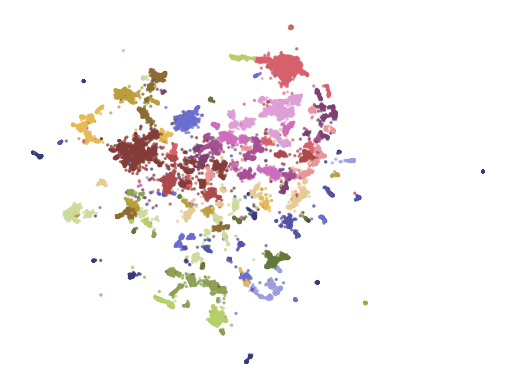

In [23]:
import matplotlib.pyplot as plt

# Plot outliers and non-outliers separately
plt.scatter(
    clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
    alpha=0.6, s=2, cmap= 'tab20b'
)
plt.axis('off')
